In [1]:
import torch
import numpy as np
import csv
import pandas as pd

import json

from torch_geometric.data import Data
from torch_geometric.loader import NeighborLoader
from torch_geometric.nn import GCNConv

import torch.nn.functional as F
from torch.optim import SGD
from torch import nn

from tqdm import tqdm

from collections import defaultdict

from sklearn.manifold import TSNE

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
from dataset import Dataset
from modules import GCN
from train import train_model

# Load Data

In [4]:
data = Dataset('datasets/facebook.npz', device=device)

In [5]:
dataloader = data.data_loader(batchsize=32)

# Build Model

# Train Model

In [6]:
gcn_model = GCN(data.graph.x.shape[1], 4, hidden_layers=[128]*2).to(device)

optimizer = SGD(gcn_model.parameters(), lr=0.2)

CELoss = torch.nn.CrossEntropyLoss()

train_model(gcn_model, optimizer, CELoss, dataloader)

20/200, Loss 0.7485:  10%|█         | 21/200 [00:08<01:15,  2.38it/s]


KeyboardInterrupt: 

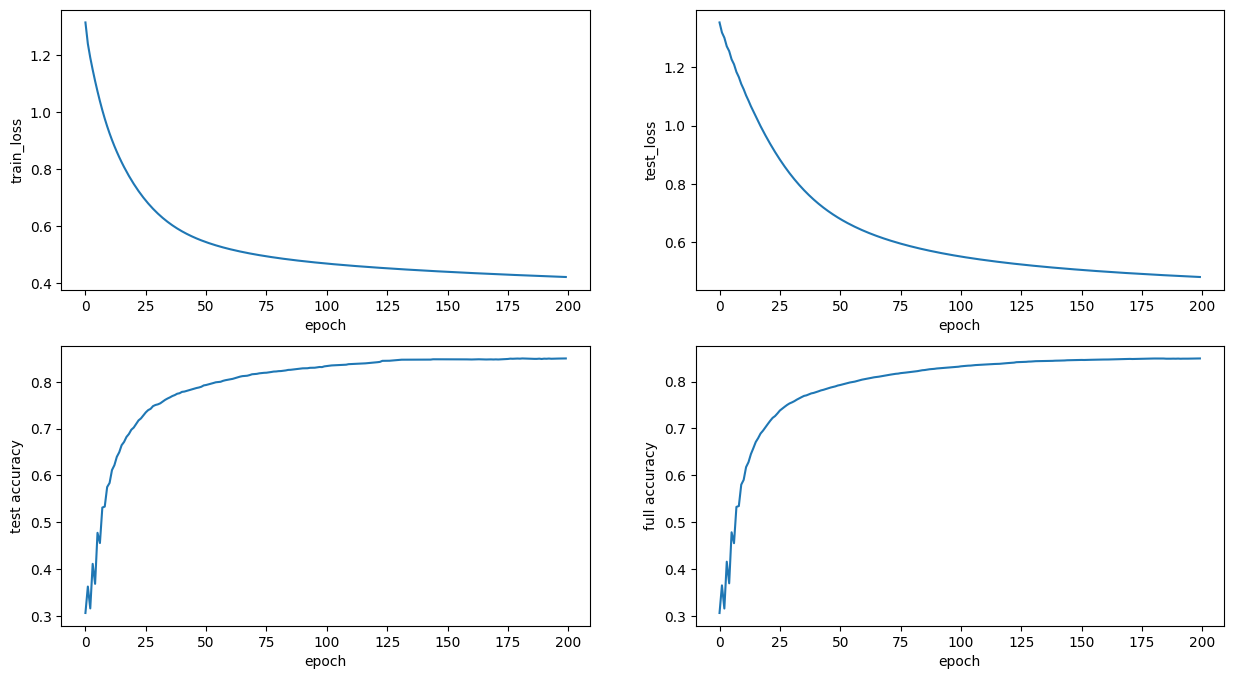

In [205]:
import matplotlib.pyplot as plt

epochs = np.arange(len(epochs))
n_plots = len(results)
nrows = int(np.ceil(n_plots/2))

fig, ax = plt.subplots(ncols=2, nrows=nrows, figsize=(15, 8))

count = 0
for result in results:
    col = count%2
    row = count//2
    ax[row, col].plot(results[result])
    ax[row, col].set_xlabel("epoch")
    ax[row, col].set_ylabel(result)
    count += 1

plt.savefig("loss.png")

In [127]:
graph_embeddings = gcn_model.embeddings(graph).to('cpu').detach().numpy()
y = graph.y.to('cpu').detach().numpy()

In [128]:
correct = gcn_model(graph).argmax(axis=1).to('cpu').detach().numpy() == y

In [129]:
import seaborn as sns
import pandas as pd

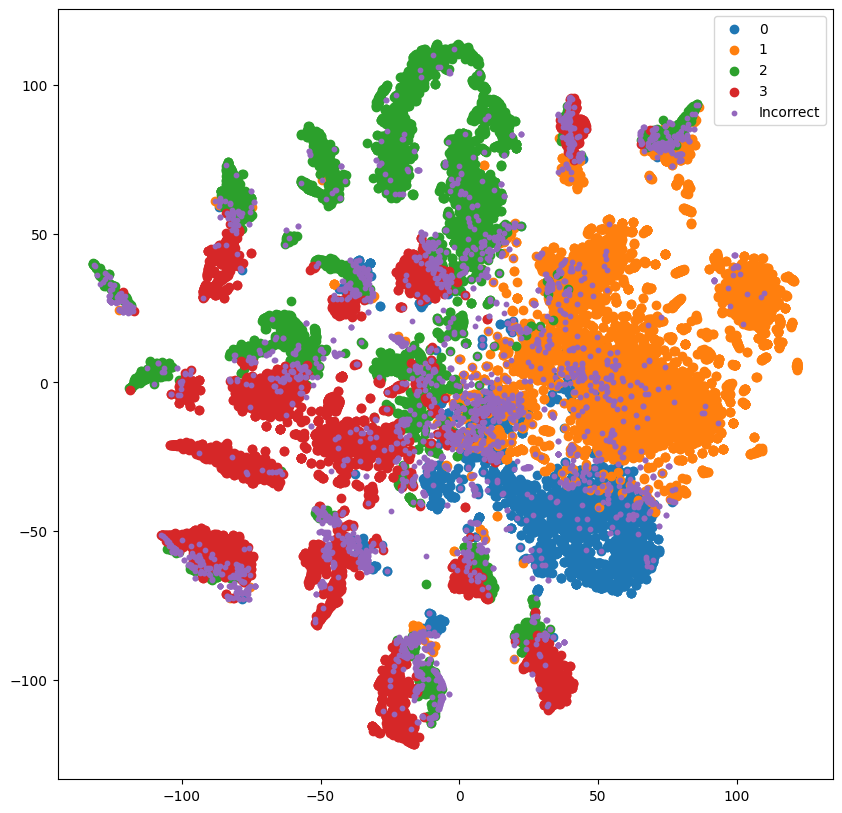

In [203]:
tsne = TSNE(n_components=2, perplexity=50, n_jobs=-1, early_exaggeration=24, n_iter=2000, n_iter_without_progress=500)#, learning_rate=100)
X_tsne = tsne.fit_transform(graph_embeddings)

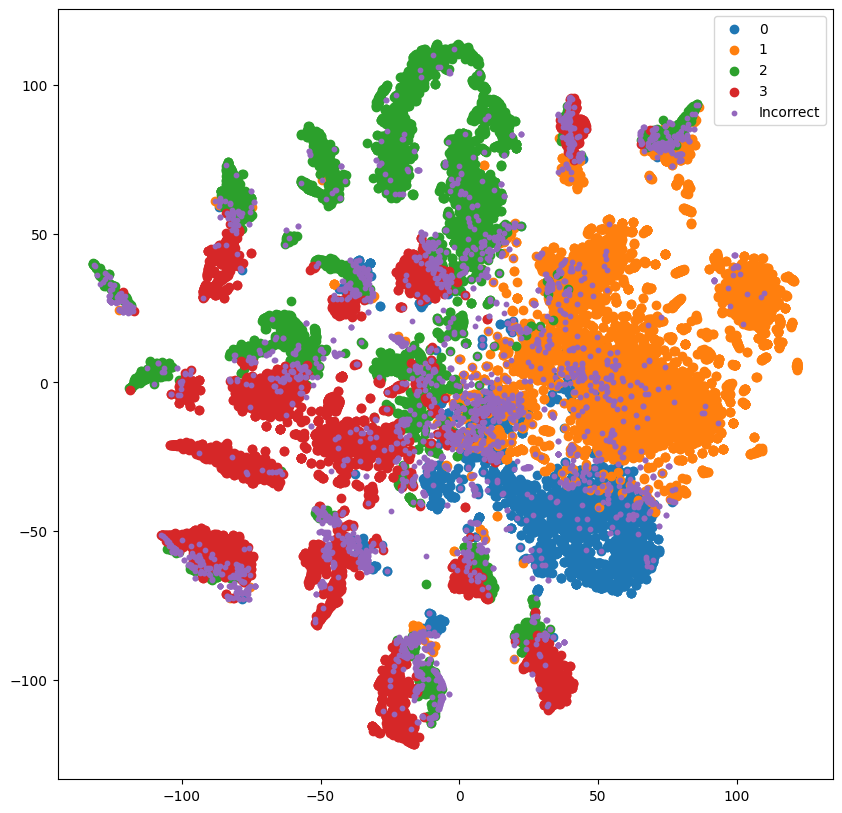

In [204]:
plt.figure(figsize=(10, 10))
for i in range(4):
    filt = y == i
    filt = np.logical_and(filt, correct)
    plt.scatter(X_tsne[filt, 0], X_tsne[filt, 1])
filt = ~correct
plt.scatter(X_tsne[filt, 0], X_tsne[filt, 1], marker='.', s=40)

plt.legend([0, 1, 2, 3, "Incorrect"])

plt.savefig("tsne.png")